In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms

## Fashion MNIST Dataset


The [Fashion MNIST Dataset](https://arxiv.org/abs/1708.07747) consists of 70 000 images of fashion products sourced from [Zalando](https://www.zalando.com/), an online fashion website. Each image is a 28x28 pixel grayscale image falling into one of 10 image categories. There are 7 000 images for each category (see the following plot for examples). This dataset was intended as a more challenging image classification task than the MNIST handwritten digits dataset. We adopted the [convention](https://arxiv.org/abs/1708.07747) of splitting the dataset into 60 000 training samples and 10 000 testing samples, ensuring that each class had an equal number of samples in both the training and testing set.

*Ethical Concerns.* This dataset was collected from a European clothing website and is not a representative sample of all clothing. In particular, it has been [demonstrated](https://www.pace.edu/news/using-african-fashion-correct-ai-bias) that clothing which does not follow 'typical' European trends is easily mis-classified by models that are trained on the Fashion MNIST dataset.

In [3]:
# Load Fashion MNIST dataset
fmnist_trainset = torchvision.datasets.FashionMNIST(root='../data/F_MNIST_data', train=True, download=True, transform=transforms.ToTensor())
fmnist_testset = torchvision.datasets.FashionMNIST(root='../data/F_MNIST_data', train=False, download=True, transform=transforms.ToTensor())

In [4]:
# Fashion MNIST Data analysis
print("Fashion MNIST dataset analysis:")
print("Number of training samples:", len(fmnist_trainset))
print("Number of test samples:", len(fmnist_testset))
print("Image shape:", fmnist_trainset[0][0].shape)
print("Number of classes:", len(fmnist_trainset.classes))

fmnist_classes = fmnist_trainset.classes
fmnist_train_targets = np.array(fmnist_trainset.targets)
fminst_test_targets = np.array(fmnist_testset.targets)

fmnist_class_ix, fmnist_class_train_counts = np.unique(fmnist_train_targets, return_counts=True)
fmnist_class_ix, fmnist_class_test_counts = np.unique(fminst_test_targets, return_counts=True)

for ix, train_count, test_count in zip(fmnist_class_ix, fmnist_class_train_counts, fmnist_class_test_counts):
  print(f'{fmnist_classes[ix]}:\n\t train samples: {train_count}, test samples: {test_count}')

Fashion MNIST dataset analysis:
Number of training samples: 60000
Number of test samples: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
T-shirt/top:
	 train samples: 6000, test samples: 1000
Trouser:
	 train samples: 6000, test samples: 1000
Pullover:
	 train samples: 6000, test samples: 1000
Dress:
	 train samples: 6000, test samples: 1000
Coat:
	 train samples: 6000, test samples: 1000
Sandal:
	 train samples: 6000, test samples: 1000
Shirt:
	 train samples: 6000, test samples: 1000
Sneaker:
	 train samples: 6000, test samples: 1000
Bag:
	 train samples: 6000, test samples: 1000
Ankle boot:
	 train samples: 6000, test samples: 1000


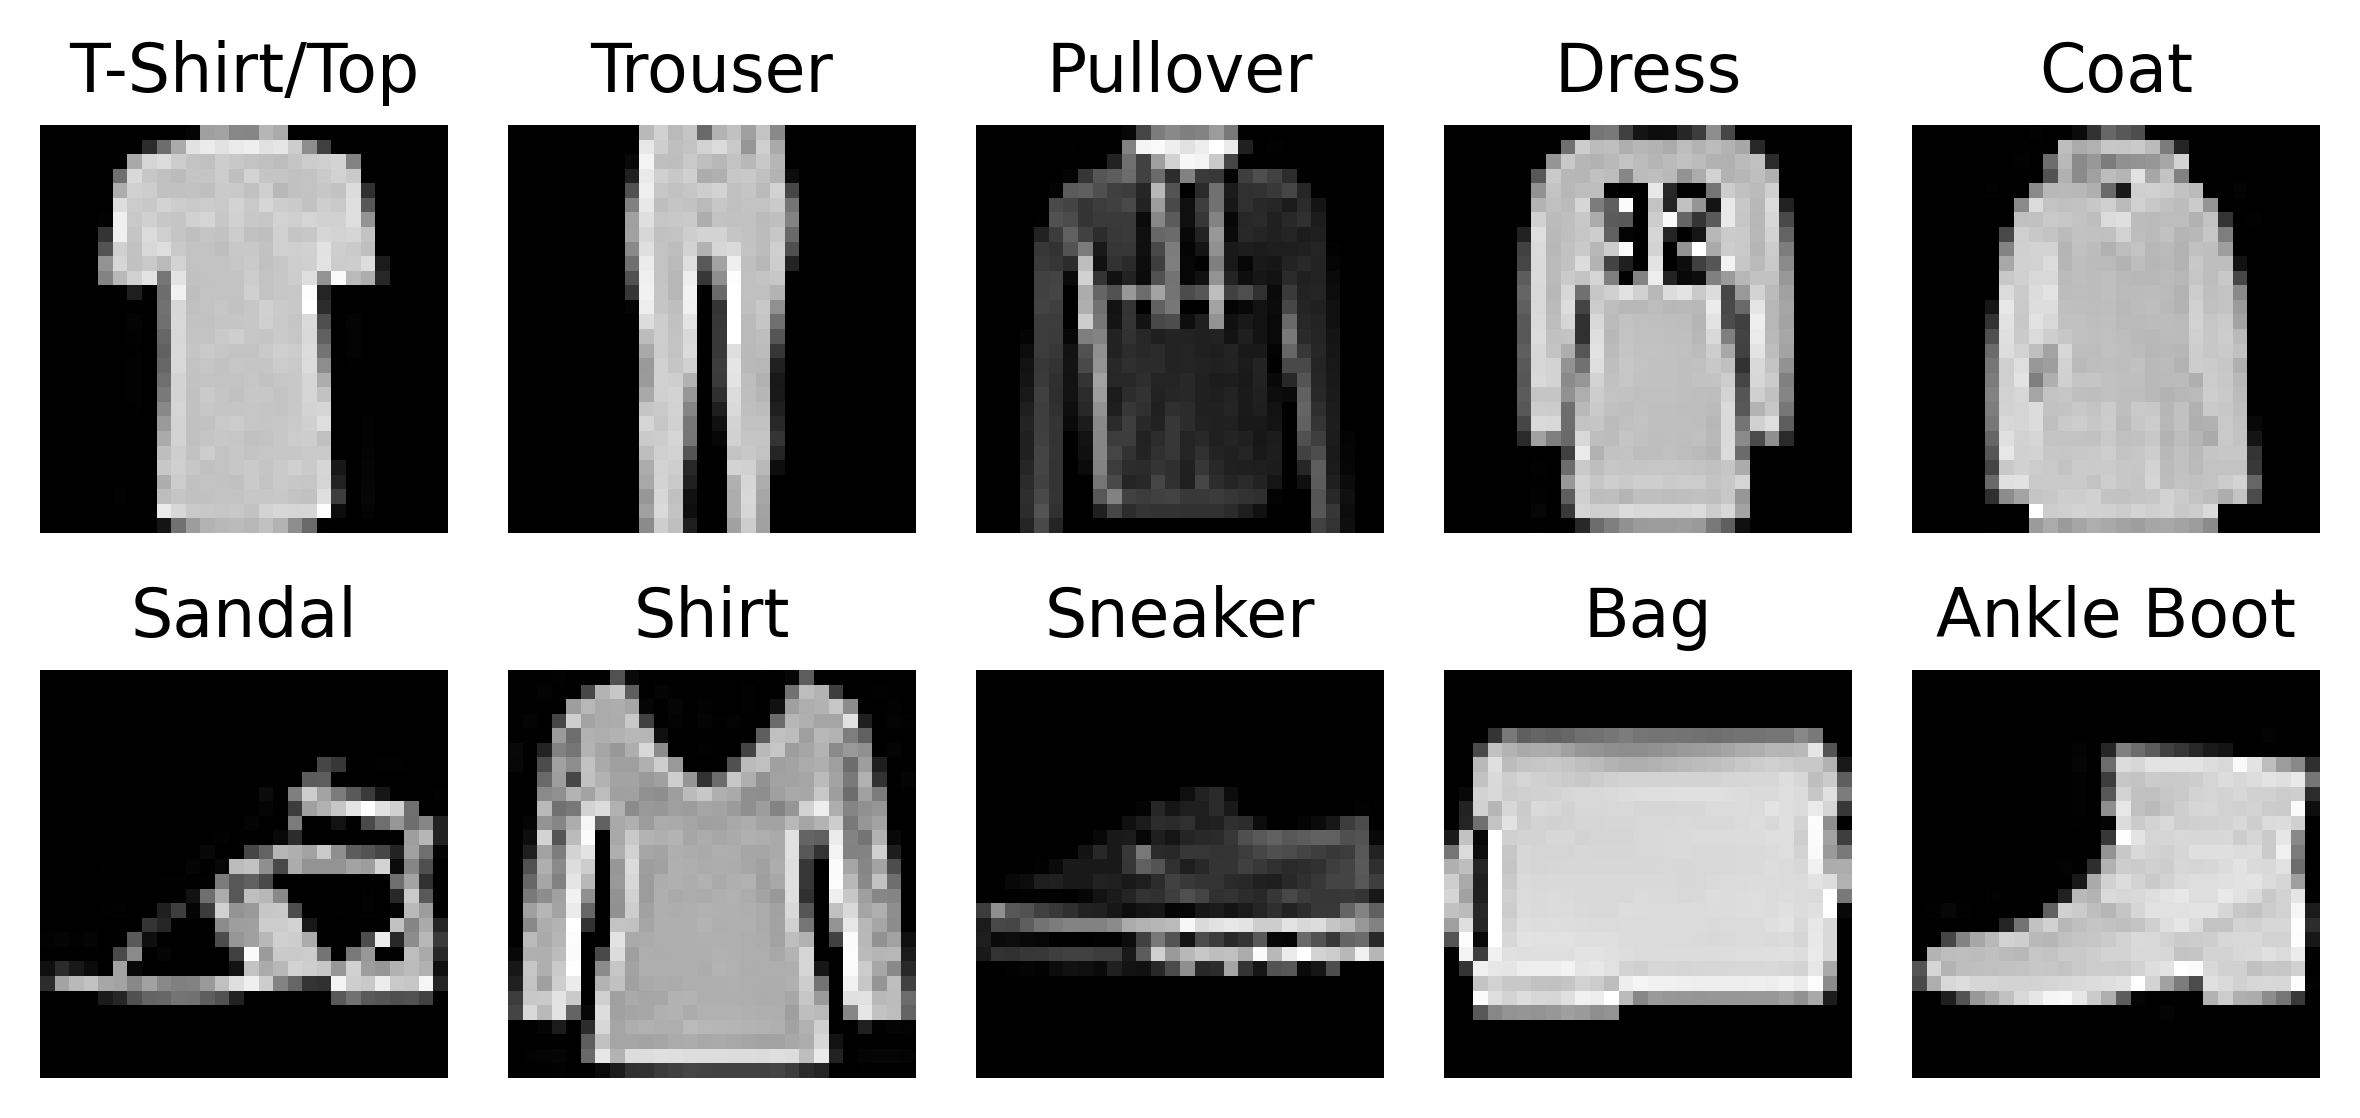

In [6]:
# Plot a sample image from each category
fig, ax = plt.subplots(2, 5, figsize=(6,3), dpi=400)
# plt.figure(figsize=(6, 2), dpi=400)

# from the set of indices corresponding to class :class:, choose a random sample.
for i, label in enumerate(fmnist_classes):
    sample_ix = np.random.choice(np.where(fmnist_train_targets == i)[0])
    image, label = fmnist_trainset[sample_ix]

    # Convert from tensor to numpy array and transpose the channels to HWC format
    image = image.numpy().transpose((1, 2, 0))
    if i < 5:
      row = 0
      col = i
    else:
      row = 1
      col = i -5

    ax[row, col].imshow(image, cmap='gray', vmin=0, vmax=1)
    ax[row, col].set_title(fmnist_classes[label].title())
    ax[row, col].axis('off')

plt.tight_layout()
plt.savefig('../out/eda/fmnist_samples.png', dpi=400)
plt.show()


### Principal Component Analysis

In [7]:
X_fminst = fmnist_trainset.data.numpy().reshape(60_000, -1)
X_fminst = X_fminst - X_fminst.mean(axis=0)

cov_fminst = np.dot(X_fminst.T, X_fminst) / X_fminst.shape[0]

In [8]:
U_fminst, S_fminst, V_fminst = np.linalg.svd(cov_fminst, full_matrices=False)

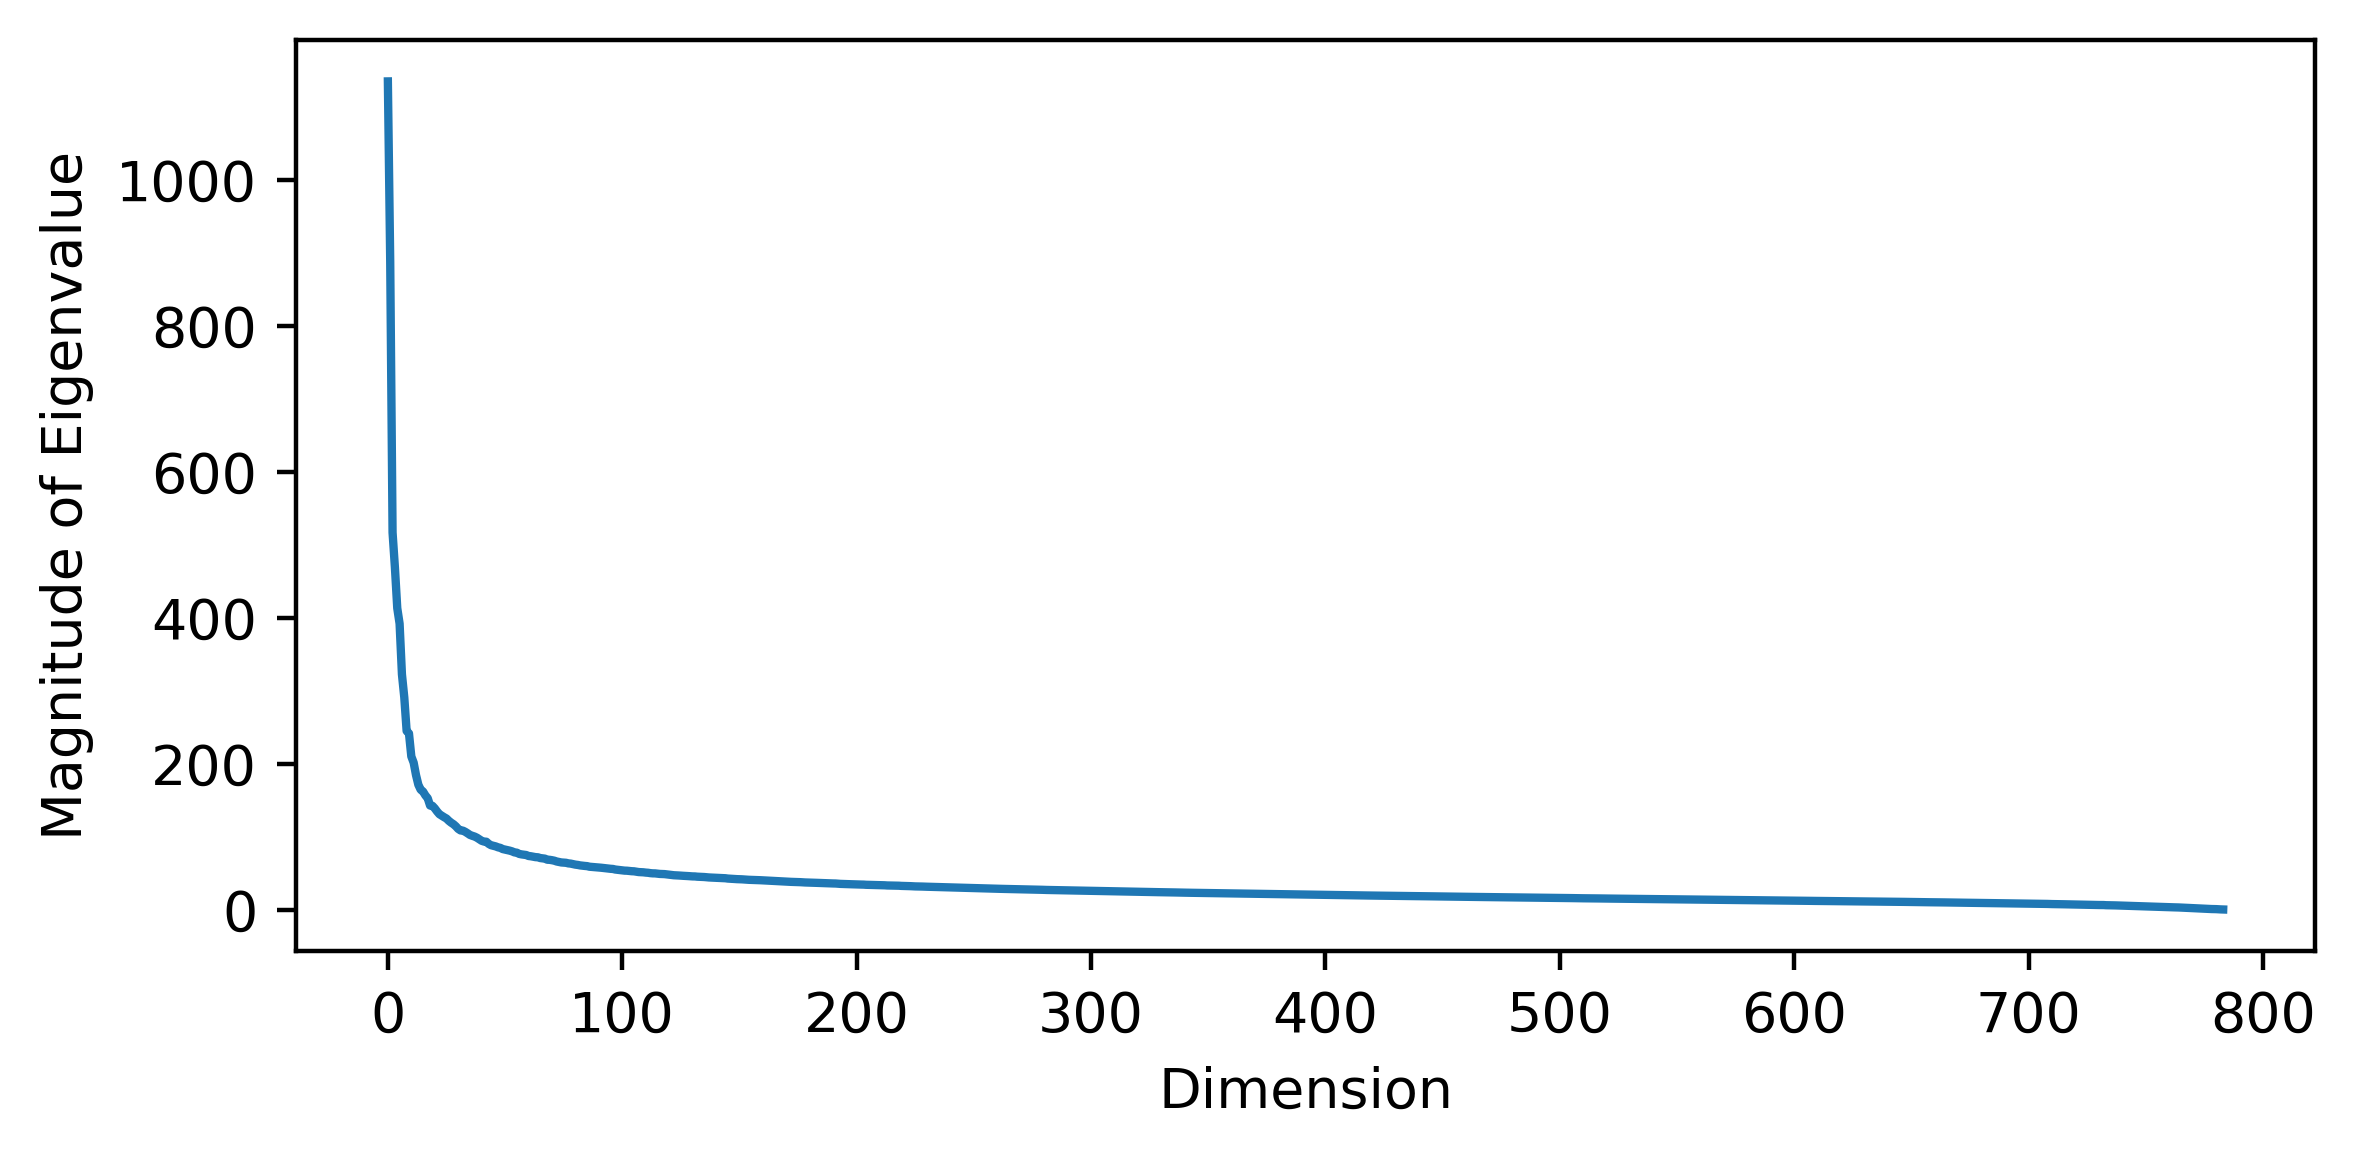

In [9]:
# Plot the magnitude of the eigenvalues.
plt.figure(figsize=(6,3), dpi=400)
plt.plot([_ for _ in range(784)], np.sqrt(np.array(S_fminst)))
plt.ylabel('Magnitude of Eigenvalue')
plt.xlabel('Dimension')
plt.tight_layout()
plt.savefig('../out/eda/fmnist_eigenvalues.png')

This plot indicates that we can approximate the images well with a low rank (e.g. $k=100$) approximation using SVD.

## CIFAR10 Dataset

The [CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) is a subset of the [Tiny Images Dataset](http://groups.csail.mit.edu/vision/TinyImages/) and consists of 60 000 images. Each image is a 32x32 colored image labelled from one of 10 categories.
There are 6 000 images for each category (see the following plot for examples). We adopted the convention of splitting the dataset into 50 000 training samples and 10 000 testing samples, ensuring that each class had an equal number of samples in both the training and testing set.

*Ethical Concerns.* The Tiny Image Dataset [contained](https://openreview.net/pdf?id=s-e2zaAlG3I) offensive judgements, derogatory terminology and systematic biases targeting marginalized communities and has been redacted. While the CIFAR10 dataset has been reviewed by human labellers, we are not aware of any audit of the CIFAR10 dataset that confirms whether or not the subset of CIFAR10 images contains any of these ethical risks.

In [2]:
# Load CIFAR-10 dataset
cifar10_trainset = torchvision.datasets.CIFAR10(root='../data/CIFAR10_data', train=True, download=True, transform=transforms.ToTensor())
cifar10_testset = torchvision.datasets.CIFAR10(root='../data/CIFAR10_data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Cifar10 Data analysis
print("CIFAR10 dataset analysis:")
print("Number of training samples:", len(cifar10_trainset))
print("Number of test samples:", len(cifar10_testset))
print("Image shape:", cifar10_trainset[0][0].shape)
# print("Number of classes:", len(fmnist_trainset.classes))

cifar10_classes = cifar10_trainset.classes
cifar10_train_targets = np.array(cifar10_trainset.targets)
cifar10_test_targets = np.array(cifar10_testset.targets)

cifar10_class_ix, cifar10_class_train_counts = np.unique(cifar10_train_targets, return_counts=True)
cifar10_class_ix, cifar10_class_test_counts = np.unique(cifar10_test_targets, return_counts=True)

for ix, train_count, test_count in zip(cifar10_class_ix, cifar10_class_train_counts, cifar10_class_test_counts):
  print(f'{cifar10_classes[ix]}:\n\t train samples: {train_count}, test samples: {test_count}')

CIFAR10 dataset analysis:
Number of training samples: 50000
Number of test samples: 10000
Image shape: torch.Size([3, 32, 32])
airplane:
	 train samples: 5000, test samples: 1000
automobile:
	 train samples: 5000, test samples: 1000
bird:
	 train samples: 5000, test samples: 1000
cat:
	 train samples: 5000, test samples: 1000
deer:
	 train samples: 5000, test samples: 1000
dog:
	 train samples: 5000, test samples: 1000
frog:
	 train samples: 5000, test samples: 1000
horse:
	 train samples: 5000, test samples: 1000
ship:
	 train samples: 5000, test samples: 1000
truck:
	 train samples: 5000, test samples: 1000


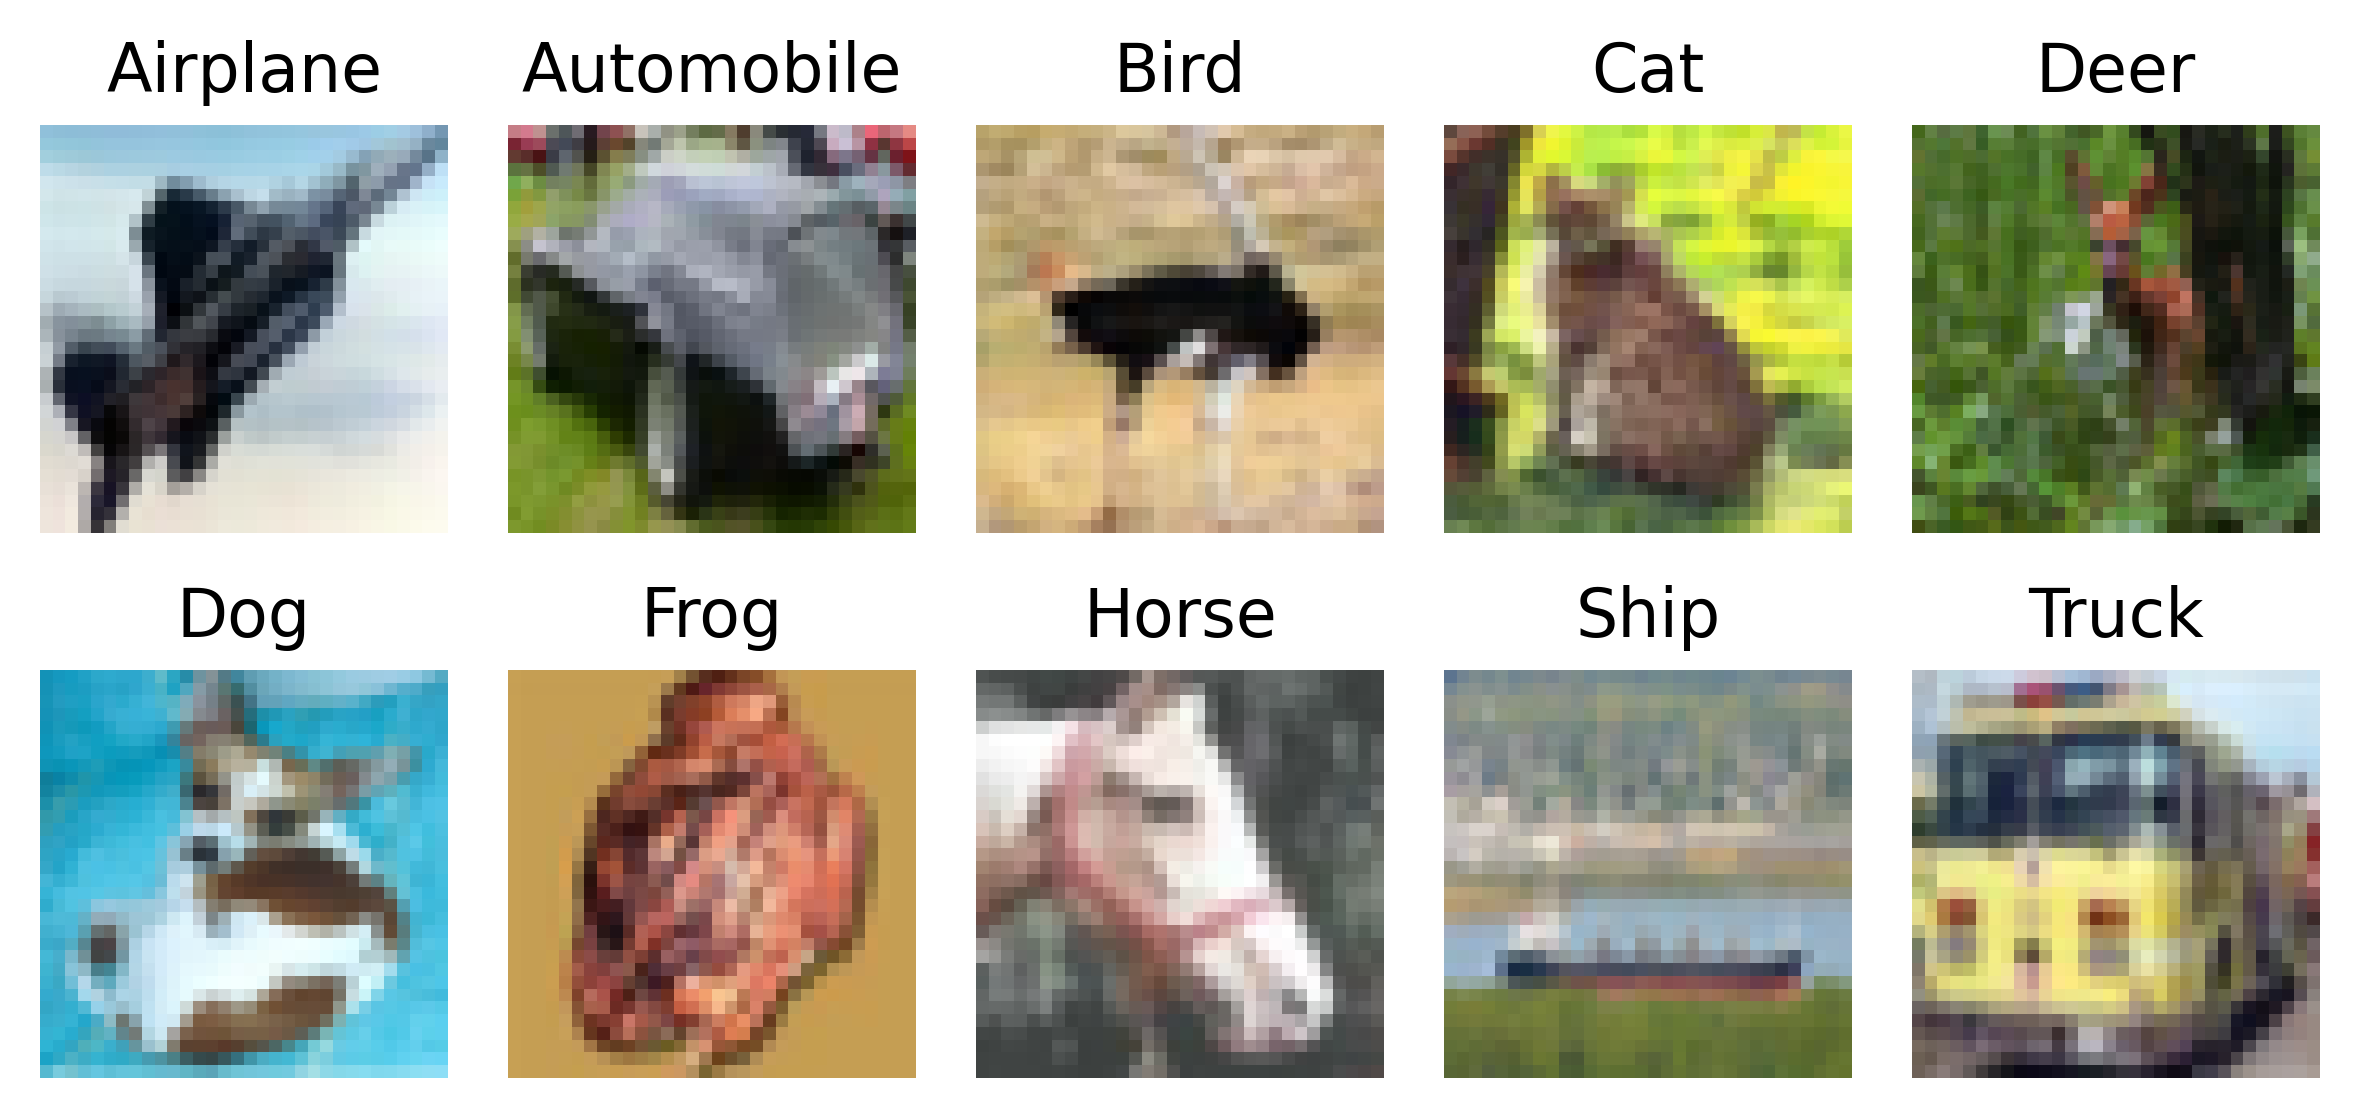

In [13]:
# Plot a sample image from each category
fig, ax = plt.subplots(2, 5, figsize=(6,3), dpi=400)

for i, label in enumerate(cifar10_classes):
    sample_ix = np.random.choice(np.where(cifar10_train_targets == i)[0])
    image, label = cifar10_trainset[sample_ix]

    # Convert from tensor to numpy array and transpose the channels to HWC format
    image = image.numpy().transpose((1, 2, 0))
    if i < 5:
      row = 0
      col = i
    else:
      row = 1
      col = i -5

    ax[row, col].imshow(image, cmap='gray', vmin=0, vmax=1)
    ax[row, col].set_title(cifar10_classes[label].title())
    ax[row, col].axis('off')

plt.tight_layout()
plt.savefig('../out/eda/cifar10_samples.png', dpi=400)
plt.show()

### Principal Comonent Analysis

In [4]:
X_cifar10 = cifar10_trainset.data.reshape(50_000, -1)
X_cifar10 = X_cifar10 - X_cifar10.mean(axis=0)

cov_cifar10 = np.dot(X_cifar10.T, X_cifar10) / X_cifar10.shape[0]

In [5]:
U_cifar10, S_cifar10, V_cifar10 = np.linalg.svd(cov_cifar10, full_matrices=False)

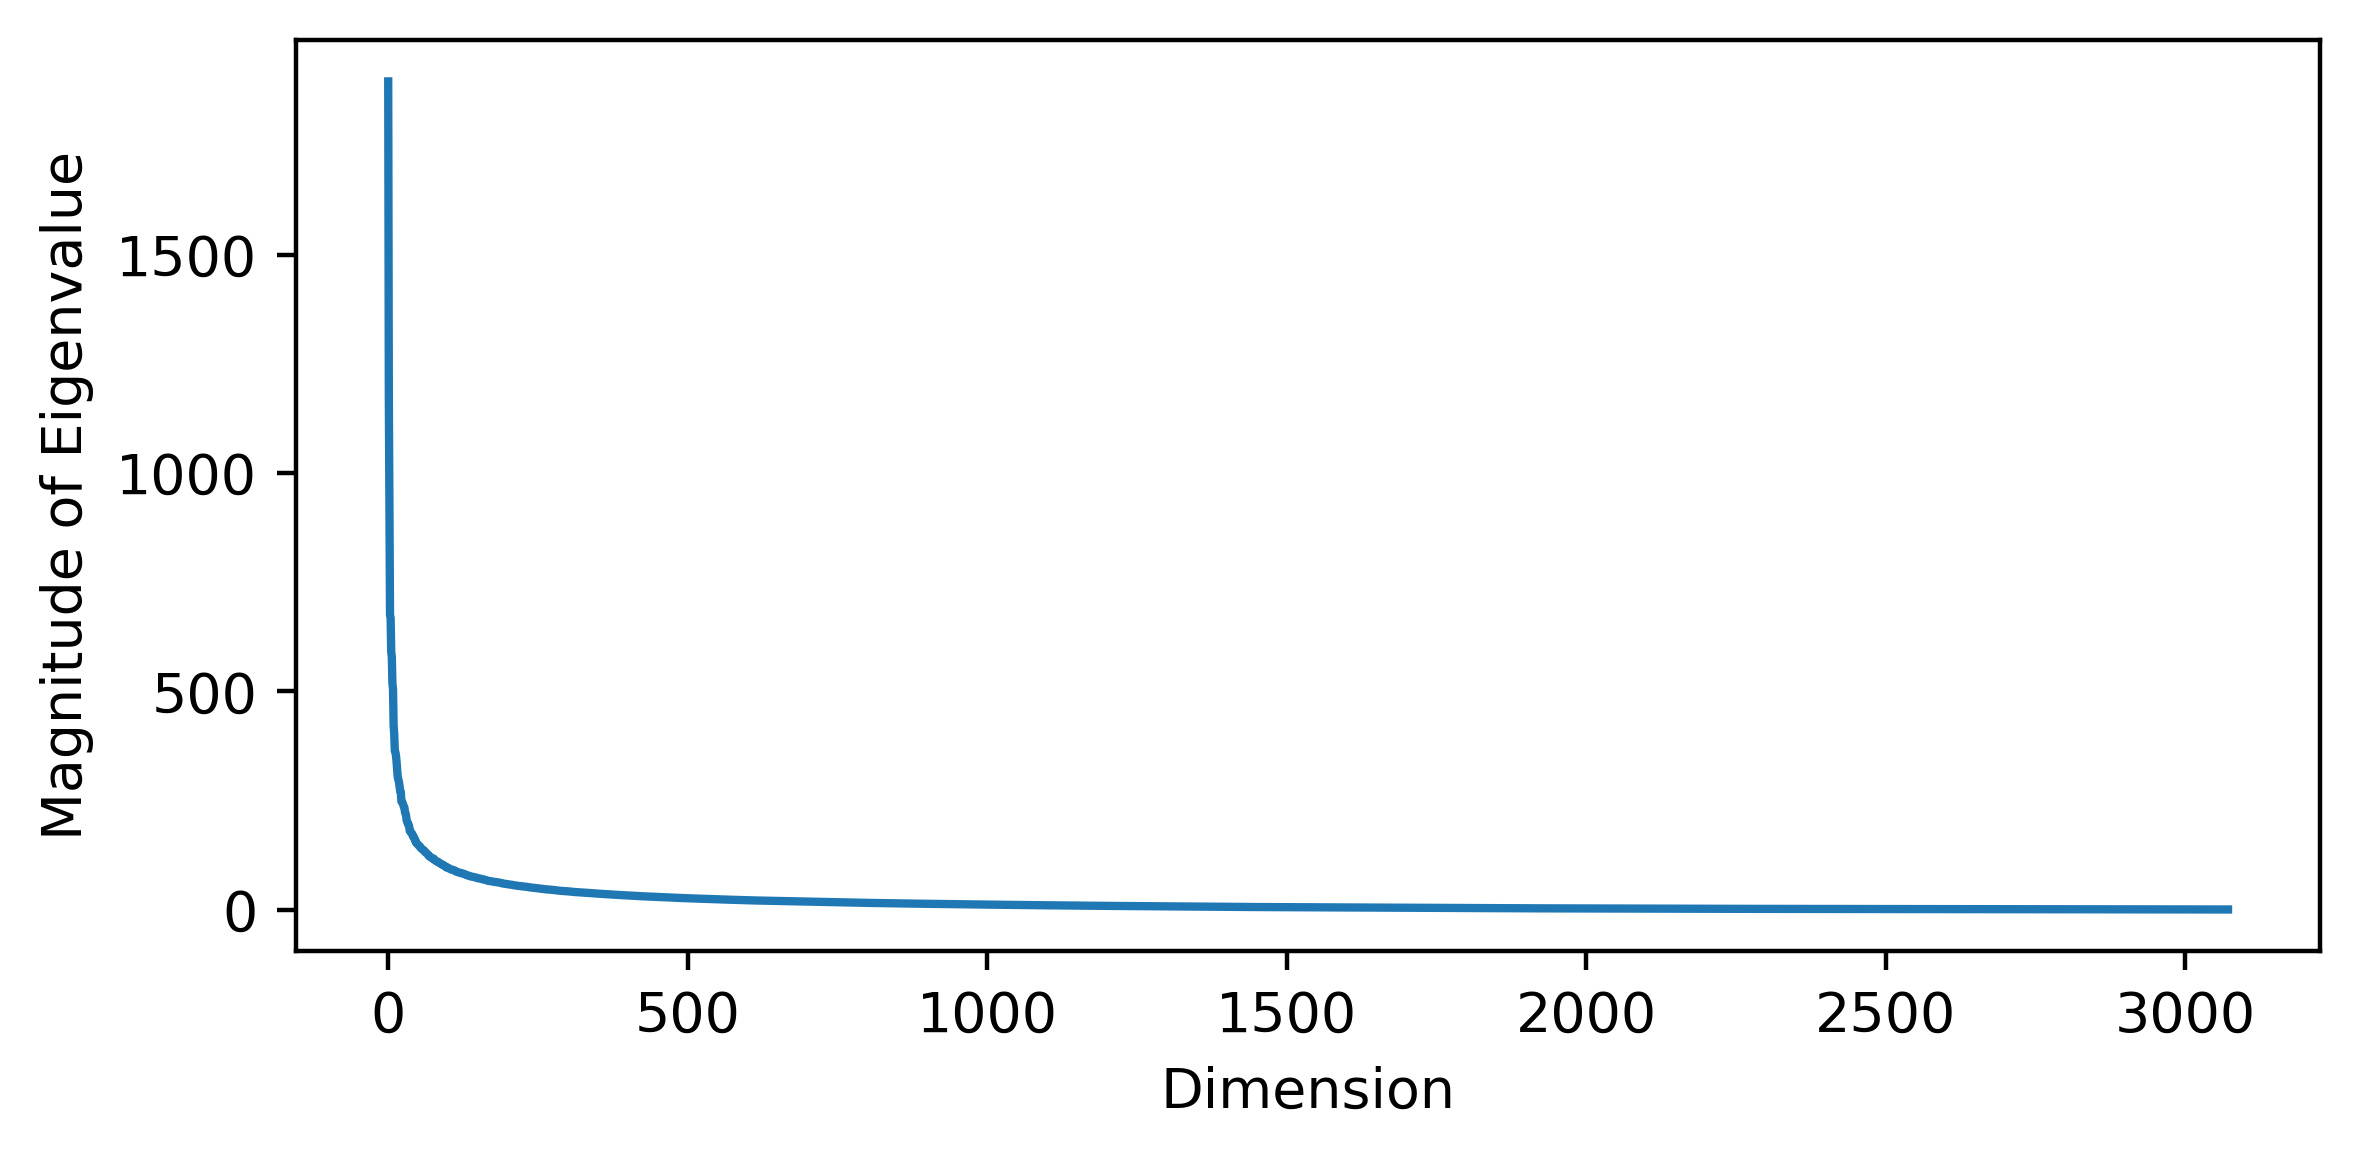

In [7]:
# Plot the magnitude of the eigenvalues.
plt.figure(figsize=(6,3), dpi=400)
plt.plot([_ for _ in range(X_cifar10.shape[1])], np.sqrt(np.array(S_cifar10)))
plt.xlabel('Dimension')
plt.ylabel('Magnitude of Eigenvalue')
plt.tight_layout()
plt.savefig('../out/eda/cifar10_eigenvalues')

As with the Fashion MNIST data, this plot indicates that we can approximate the images well with a low rank (e.g. $k=250$) approximation using SVD.